In [2]:
import dataclasses
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import model_selection
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV,ElasticNetCV
from pyentrp import entropy as pyent
import EntropyHub as EH
import neurokit2 as nk
from datetime import datetime
import random
import sampen
import requests
import io
import apache_log_parser
from pprint import pprint
import os
from sklearn import preprocessing
from progress.bar import Bar


In [3]:
log_line_data = None
line_parser = apache_log_parser.make_parser("%h %l %u %t \"%r\" %>s %b")
with open(f"{os.getcwd()}/wc_day73_1.log", mode='r') as f1, open(f"{os.getcwd()}/wc_day73_2.log", mode='r') as f2, open(f"{os.getcwd()}/wc_day73_3.log", mode='r') as f3, open(f"{os.getcwd()}/wc_day73_4.log", mode='r') as f4, open(f"{os.getcwd()}/wc_day73_5.log", mode='r') as f5, open(f"{os.getcwd()}/wc_day73_6.log", mode='r') as f6, open(f"{os.getcwd()}/wc_day74_1.log", mode='r') as f7:
    log_line_data = [line_parser(line) for line in f1.readlines() + f2.readlines() + f3.readlines() + f4.readlines() + f5.readlines() + f6.readlines() + f7.readlines()]


SyntaxError: invalid syntax (765102269.py, line 3)

In [46]:
df_log_line_data = pd.DataFrame([{"date": df_line["time_received_datetimeobj"], "count": 1} for df_line in log_line_data])

In [47]:
df_S = df_log_line_data.groupby(pd.Grouper(key="date", freq="S")).sum().reset_index()

In [48]:
df_S.to_csv(f"{os.getcwd()}/wc_day73.csv")

In [7]:
from dateutil import parser

line = '35743 - - [30/Jun/1998:22:00:03 +0000] "GET /js/factoid.js HTTP/1.0" 200 12302'.replace(':', ' ', 1).replace('[', '', 1).replace(']', '', 1)
timestamp = line.split()[3]+" "+line.split()[4] 
parser.parse(timestamp)

datetime.datetime(1998, 6, 30, 22, 0, 3)

In [4]:
def log2csv(prefix: str):
    log_line_data = []
    with open(f"{os.getcwd()}/{prefix}.log", mode='r', encoding="utf8", errors='ignore') as f1:
        log_line_data = np.array([line for line in f1.readlines()])
    replaced = pd.DataFrame([{"date": datetime.strptime(line.split()[3]+" "+line.split()[4],  "[%d/%b/%Y:%H:%M:%S +0000]"), "count": 1} for line in log_line_data])
    replaced.groupby(pd.Grouper(key="date", freq="S")).sum().reset_index().to_csv(f"{prefix}.csv")


In [43]:
log2csv("wc_day67_3")
log2csv("wc_day67_4")
log2csv("wc_day67_5")
log2csv("wc_day68_1")
log2csv("wc_day68_2")
log2csv("wc_day68_3")
log2csv("wc_day69_1")

In [20]:
replaced2 = np.array([line.split()[3]+" "+line.split()[4] for line in replaced])

In [24]:
from dateutil import parser


replaced2[0], parser.parse(replaced2[0])

('01/Jul/1998 01:57:34', datetime.datetime(1998, 7, 1, 1, 57, 34))

In [31]:
datetime.strptime('01/Jul/1998 01:57:34', "%d/%b/%Y %H:%M:%S")                                       # => datetime.datetime(2018, 12, 7, 0, 0)

datetime.datetime(1998, 7, 1, 1, 57, 34)

In [32]:
replaced3 = np.array([datetime.strptime(line, "%d/%b/%Y %H:%M:%S") for line in replaced2])

In [33]:
replaced4 = pd.DataFrame([{"date": line, "count": 1} for line in replaced3])

In [7]:
df_S_67_1 = pd.read_csv("wc_day67_1.csv")
df_S_67_1

,Unnamed: 0,date,count
0,0,1998-06-30 22:00:01,496
1,1,1998-06-30 22:00:02,1110
2,2,1998-06-30 22:00:03,1302
3,3,1998-06-30 22:00:04,1461
4,4,1998-06-30 22:00:05,1813
...,...,...,...
14249,14249,1998-07-01 01:57:30,265
14250,14250,1998-07-01 01:57:31,294
14251,14251,1998-07-01 01:57:32,261
14252,14252,1998-07-01 01:57:33,299


In [6]:
df_min_67_1 = df_S_67_1.groupby(pd.Grouper(key="date", freq="min")).sum().reset_index()

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Index'

In [4]:
plt.plot(df_S_67_1["date"], df_S_67_1["count"])

Error in callback <function flush_figures at 0x10e0d4f70> (for post_execute):


KeyboardInterrupt: 

In [3]:
log_line_data = None
line_parser = apache_log_parser.make_parser("%h %l %u %t \"%r\" %>s %b")
with open(f"{os.getcwd()}/wc_day67_2.log", mode='r', encoding="utf8", errors='ignore') as f1:
    log_line_data = [line_parser(line) for line in f1.readlines()]


In [ ]:
df_SS = (pd.read_csv("wc_day67_1.csv")
            .append(pd.read_csv("wc_day67_2.csv"), ignore_index=True)
            .append(pd.read_csv("wc_day67_3.csv"), ignore_index=True)
            .append(pd.read_csv("wc_day67_4.csv"), ignore_index=True)
            .append(pd.read_csv("wc_day67_5.csv"), ignore_index=True)
            .append(pd.read_csv("wc_day68_1.csv"), ignore_index=True)
            .append(pd.read_csv("wc_day68_2.csv"), ignore_index=True)
            .append(pd.read_csv("wc_day68_3.csv"), ignore_index=True)
            .append(pd.read_csv("wc_day69_1.csv"), ignore_index=True)
)


In [ ]:
df_SS

In [ ]:
df_SS_date =  pd.to_datetime(df_SS["date"]).astype(int).array.reshape(-1, 1)
df_SS_count = df_SS["count"].array.reshape(-1, 1)
plt.plot(df_SS_date, df_SS_count)

In [ ]:
df_SS_date = df_S_date = pd.to_datetime(df_S["date"]).astype(int).array.reshape(-1, 1)
df_SS_count = df_S["count"].array.reshape(-1, 1)

In [ ]:
def log2csv(prefix: str):
    log_line_data = []
    with open(f"{os.getcwd()}/{prefix}.log", mode='r', encoding="utf8", errors='ignore') as f1:
        log_line_data = np.array([line for line in f1.readlines()])
    replaced = pd.DataFrame([{"date": datetime.strptime(line.split()[3]+" "+line.split()[4],  "[%d/%b/%Y:%H:%M:%S +0000]"), "count": 1} for line in log_line_data])
    replaced.groupby(pd.Grouper(key="date", freq="S")).sum().reset_index().to_csv(f"{prefix}.csv")


In [ ]:
log2csv("wc_day62_1")
log2csv("wc_day62_2")
log2csv("wc_day62_3")
log2csv("wc_day62_4")
log2csv("wc_day62_5")
log2csv("wc_day62_6")
log2csv("wc_day62_7")
log2csv("wc_day62_8")
log2csv("wc_day62_9")
log2csv("wc_day62_1")
log2csv("wc_day63_1")
log2csv("wc_day63_2")

In [ ]:
log2csv("wc_day62_10")

In [5]:
df_SS_2 = (         pd.read_csv("wc_day62_1.csv")
            .append(pd.read_csv("wc_day62_2.csv"), ignore_index=True)
            .append(pd.read_csv("wc_day62_3.csv"), ignore_index=True)
            .append(pd.read_csv("wc_day62_4.csv"), ignore_index=True)
            .append(pd.read_csv("wc_day62_5.csv"), ignore_index=True)
            .append(pd.read_csv("wc_day62_6.csv"), ignore_index=True)
            .append(pd.read_csv("wc_day62_7.csv"), ignore_index=True)
            .append(pd.read_csv("wc_day62_8.csv"), ignore_index=True)
            .append(pd.read_csv("wc_day62_9.csv"), ignore_index=True)
            .append(pd.read_csv("wc_day62_10.csv"), ignore_index=True)
            .append(pd.read_csv("wc_day63_1.csv"), ignore_index=True)
            .append(pd.read_csv("wc_day63_2.csv"), ignore_index=True)
)
df_SS_2.to_csv('wc_day62_63.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'wc_day62_1.csv'

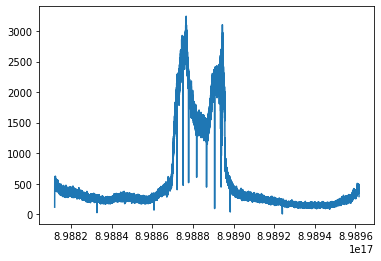

In [3]:
df_SS_2 = pd.read_csv("wc_day62_63.csv")
df_SS_date_2 =  pd.to_datetime(df_SS_2["date"]).astype(int).array.reshape(-1, 1)
df_SS_count_2 = df_SS_2["count"].array.reshape(-1, 1)
plt.plot(df_SS_date_2, df_SS_count_2)

In [55]:

from typing import Optional
import dataclasses

@dataclasses.dataclass
class Hoge:
    val: str

    @staticmethod
    def apply(raw: str) -> Optional['Hoge']:
        if raw == "a":
            return Hoge(raw)
        else:
            return None

    def wow(self):
        print(f"wowow!! {self.val}!!")

Hoge.apply('a').wow()
Hoge.apply('baa').wow()

wowow!! a!!


AttributeError: 'NoneType' object has no attribute 'wow'

In [52]:
if Hoge("howaaa") is None:
    print("None")
else:
    print("Some")

Some


In [53]:
if Hoge("a") is None:
    print("None")
else:
    print("Some")

Some


In [47]:
df_SS

,Unnamed: 0,date,count
0,0,1998-06-30 22:00:01,496
1,1,1998-06-30 22:00:02,1110
2,2,1998-06-30 22:00:03,1302
3,3,1998-06-30 22:00:04,1461
4,4,1998-06-30 22:00:05,1813
...,...,...,...
216437,43631,1998-07-03 10:07:12,164
216438,43632,1998-07-03 10:07:13,176
216439,43633,1998-07-03 10:07:14,159
216440,43634,1998-07-03 10:07:15,173


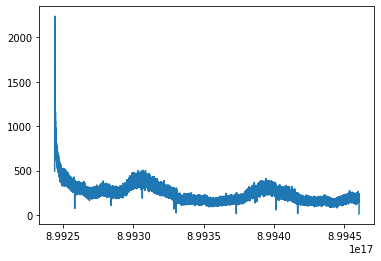

In [51]:
df_SS_date =  pd.to_datetime(df_SS["date"]).astype(int).array.reshape(-1, 1)
df_SS_count = df_SS["count"].array.reshape(-1, 1)
plt.plot(df_SS_date, df_SS_count)

In [ ]:
df_SS_date = df_S_date = pd.to_datetime(df_S["date"]).astype(int).array.reshape(-1, 1)
df_SS_count = df_S["count"].array.reshape(-1, 1)

In [53]:
def log2csv(prefix: str):
    log_line_data = []
    with open(f"{os.getcwd()}/{prefix}.log", mode='r', encoding="utf8", errors='ignore') as f1:
        log_line_data = np.array([line for line in f1.readlines()])
    replaced = pd.DataFrame([{"date": datetime.strptime(line.split()[3]+" "+line.split()[4],  "[%d/%b/%Y:%H:%M:%S +0000]"), "count": 1} for line in log_line_data])
    replaced.groupby(pd.Grouper(key="date", freq="S")).sum().reset_index().to_csv(f"{prefix}.csv")


In [54]:
log2csv("wc_day62_1")
log2csv("wc_day62_2")
log2csv("wc_day62_3")
log2csv("wc_day62_4")
log2csv("wc_day62_5")
log2csv("wc_day62_6")
log2csv("wc_day62_7")
log2csv("wc_day62_8")
log2csv("wc_day62_9")
log2csv("wc_day62_1")
log2csv("wc_day63_1")
log2csv("wc_day63_2")

In [55]:
log2csv("wc_day62_10")

In [60]:
df_SS_2 = (         pd.read_csv("wc_day62_1.csv")
            .append(pd.read_csv("wc_day62_2.csv"), ignore_index=True)
            .append(pd.read_csv("wc_day62_3.csv"), ignore_index=True)
            .append(pd.read_csv("wc_day62_4.csv"), ignore_index=True)
            .append(pd.read_csv("wc_day62_5.csv"), ignore_index=True)
            .append(pd.read_csv("wc_day62_6.csv"), ignore_index=True)
            .append(pd.read_csv("wc_day62_7.csv"), ignore_index=True)
            .append(pd.read_csv("wc_day62_8.csv"), ignore_index=True)
            .append(pd.read_csv("wc_day62_9.csv"), ignore_index=True)
            .append(pd.read_csv("wc_day62_10.csv"), ignore_index=True)
            .append(pd.read_csv("wc_day63_1.csv"), ignore_index=True)
            .append(pd.read_csv("wc_day63_2.csv"), ignore_index=True)
)
df_SS_2.to_csv('wc_day62_63.csv')

/var/folders/zk/cf948rq56631k5dgzn62fkjm0000gn/T/ipykernel_18334/789111281.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_SS_2 = (         pd.read_csv("wc_day62_1.csv")
/var/folders/zk/cf948rq56631k5dgzn62fkjm0000gn/T/ipykernel_18334/789111281.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_SS_2 = (         pd.read_csv("wc_day62_1.csv")
/var/folders/zk/cf948rq56631k5dgzn62fkjm0000gn/T/ipykernel_18334/789111281.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_SS_2 = (         pd.read_csv("wc_day62_1.csv")
/var/folders/zk/cf948rq56631k5dgzn62fkjm0000gn/T/ipykernel_18334/789111281.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

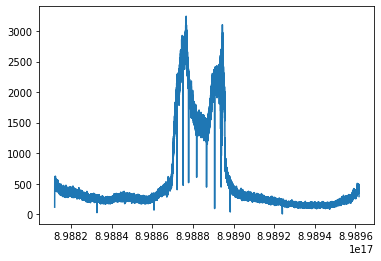

In [6]:
df_SS_2 = pd.read_csv("wc_day62_63.csv")
df_SS_date_2 =  pd.to_datetime(df_SS_2["date"]).astype(int).array.reshape(-1, 1)
df_SS_count_2 = df_SS_2["count"].array.reshape(-1, 1)
plt.plot(df_SS_date_2, df_SS_count_2)

In [7]:
df_SS_2


,Unnamed: 0.1,Unnamed: 0,date,count
0,0,0,1998-06-25 22:00:01,116
1,1,1,1998-06-25 22:00:02,281
2,2,2,1998-06-25 22:00:03,307
3,3,3,1998-06-25 22:00:04,350
4,4,4,1998-06-25 22:00:05,380
...,...,...,...,...
149756,149756,37731,1998-06-27 15:35:47,382
149757,149757,37732,1998-06-27 15:35:48,448
149758,149758,37733,1998-06-27 15:35:49,414
149759,149759,37734,1998-06-27 15:35:50,413
